In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

from scipy.signal import find_peaks
from numpy.fft import fft, ifft

Prominent frequencies for theta_k =  0.82  are  [0.01, 0.03, 0.152, 0.169, 0.17200000000000001]
Time periods for theta_k =  0.82  are  [100.          33.33333333   6.57894737   5.91715976   5.81395349]
Prominent Peak values for theta_k =  0.82  are  [19.939389013616854, 13.658118024048434, 20.363169999084878, 15.662481571588955, 17.307636796132375]


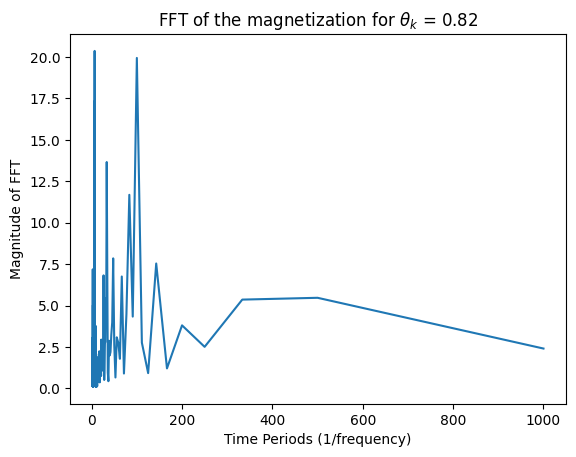

Prominent frequencies for theta_k =  0.65  are  [0.012, 0.022, 0.025, 0.133, 0.135]
Time periods for theta_k =  0.65  are  [83.33333333 45.45454545 40.          7.51879699  7.40740741]
Prominent Peak values for theta_k =  0.65  are  [14.5159945496312, 12.973822176140422, 17.656609680074293, 17.40289565741982, 14.475693399132965]


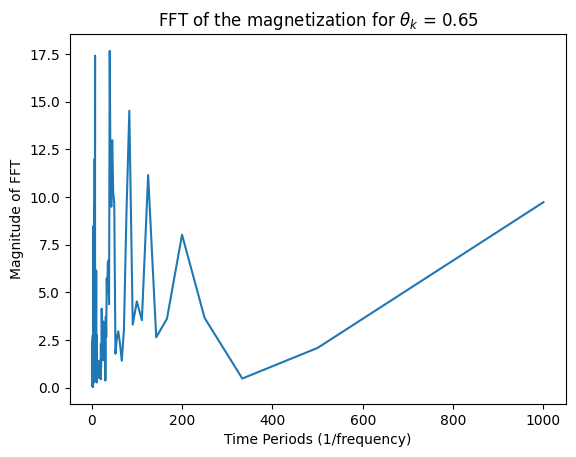

Prominent frequencies for theta_k =  0.62  are  [0.008, 0.021, 0.024, 0.129, 0.131, 0.133]
Time periods for theta_k =  0.62  are  [125.          47.61904762  41.66666667   7.75193798   7.63358779
   7.51879699]
Prominent Peak values for theta_k =  0.62  are  [13.142985827544326, 15.471133840054021, 17.52759086148381, 18.27503131224983, 12.597580458658513, 12.738509466919744]


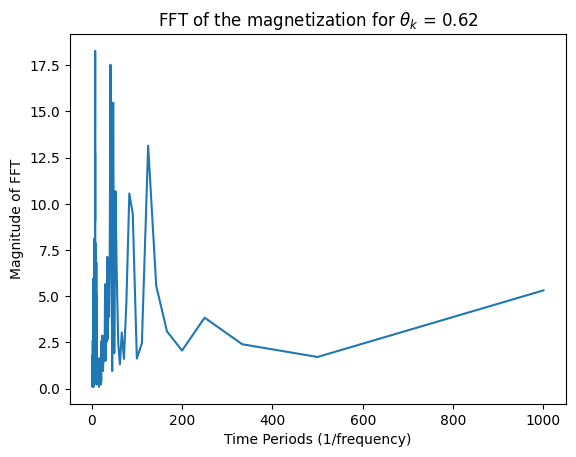

Prominent frequencies for theta_k =  0.55  are  [0.008, 0.016, 0.022, 0.116, 0.12, 0.176]
Time periods for theta_k =  0.55  are  [125.          62.5         45.45454545   8.62068966   8.33333333
   5.68181818]
Prominent Peak values for theta_k =  0.55  are  [16.305190127498356, 36.01697887606704, 20.903450314560327, 22.402405639674473, 30.9295125051296, 14.121298804296378]


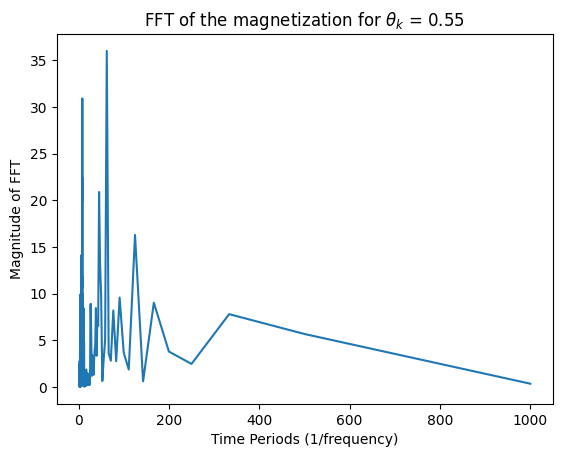

Prominent frequencies for theta_k =  0.52  are  [0.006, 0.009000000000000001, 0.013000000000000001, 0.015, 0.021, 0.025, 0.111, 0.114, 0.116]
Time periods for theta_k =  0.52  are  [166.66666667 111.11111111  76.92307692  66.66666667  47.61904762
  40.           9.00900901   8.77192982   8.62068966]
Prominent Peak values for theta_k =  0.52  are  [12.538683474288051, 12.265013906823324, 12.346529546843533, 27.012639763958738, 17.135148652844304, 13.01849468253315, 19.747575575261106, 12.583339961824443, 18.013405941184324]


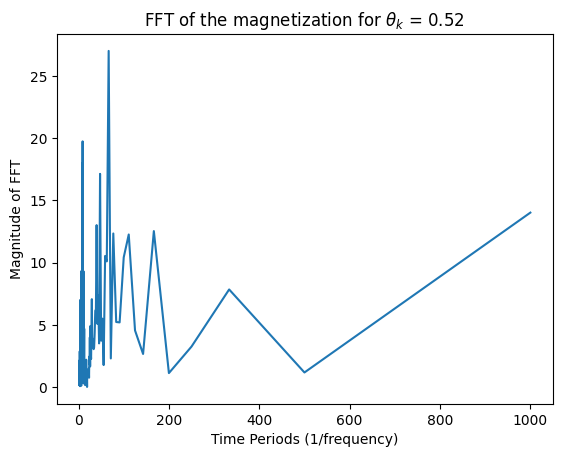

Prominent frequencies for theta_k =  0.45  are  [0.01, 0.019, 0.084, 0.08700000000000001, 0.1, 0.105]
Time periods for theta_k =  0.45  are  [100.          52.63157895  11.9047619   11.49425287  10.
   9.52380952]
Prominent Peak values for theta_k =  0.45  are  [30.515990738247705, 18.63665383815421, 23.267831888646338, 12.641443180160786, 22.7084040798369, 39.37550648467648]


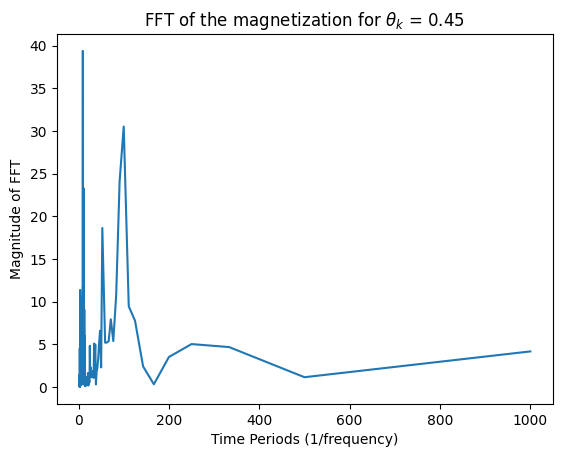

Prominent frequencies for theta_k =  0.42  are  [0.009000000000000001, 0.018000000000000002, 0.08, 0.083, 0.096, 0.101, 0.187]
Time periods for theta_k =  0.42  are  [111.11111111  55.55555556  12.5         12.04819277  10.41666667
   9.9009901    5.34759358]
Prominent Peak values for theta_k =  0.42  are  [32.66960959592951, 19.549451394059826, 21.07526181102325, 18.206927444928922, 15.20697088930938, 34.203028691283805, 13.417815495052745]


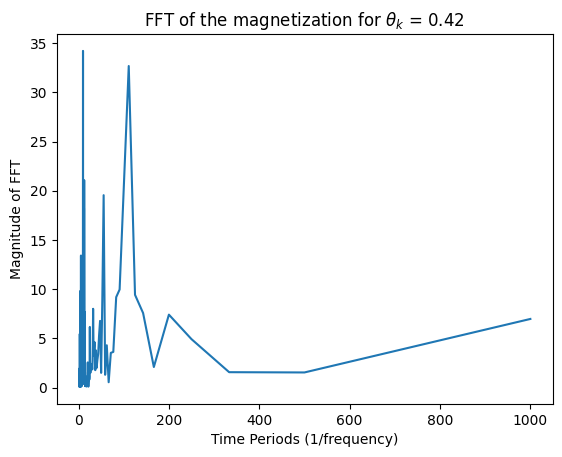

In [2]:
N = 6
theta= 1.07 #pass the true values here
theta_k_list = [0.82, 0.65, 0.62, 0.55,0.52, 0.45, 0.42]
max_trotter_steps = 1000

#i = 0

sz_vals = [0]*max_trotter_steps 
sz_vals2 = [0]*max_trotter_steps
sz_vals3 = [0]*max_trotter_steps
sz_vals4 = [0]*max_trotter_steps
sz_vals5 = [0]*max_trotter_steps

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""
for theta_k in theta_k_list:
    for i in range(max_trotter_steps):
        data2 = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals2[i] = data2[1]  

        #FFT to find out the frequency of the oscillations
    fft1 = fft(sz_vals2)
        #find list of frequencies

    freqs = np.fft.fftfreq(len(sz_vals2))
        #find the peaks
    peaks, _ = find_peaks(np.abs(fft1))
    peaks = peaks[freqs[peaks] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs = [freqs[i] for i in peaks if np.abs(fft1[i]) > 12]

    time_periods = 1/np.abs(prom_freqs)

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks

    print("Prominent frequencies for theta_k = ",theta_k," are ",prom_freqs) #print the prominent frequencies
    print("Time periods for theta_k = ",theta_k," are ",time_periods) #print the time periods

    peak_vals = [np.abs(fft1[i]) for i in peaks if np.abs(fft1[i]) > 12] #find the prominent peak values

    print("Prominent Peak values for theta_k = ",theta_k," are ",peak_vals) #print the peak values

    #Plot only the positive frequencies and the magnitudes at those frequencies

    freqs_pos = freqs[freqs > 0]
    time_periods_1 = 1/freqs_pos
    fft1_pos = fft1[freqs > 0]

    plt.plot(time_periods_1,np.abs(fft1_pos))
    plt.xlabel("Time Periods (1/frequency)")
    plt.ylabel("Magnitude of FFT")
    plt.title(r"FFT of the magnetization for $\theta_k$ = " + str(theta_k))
    plt.show()


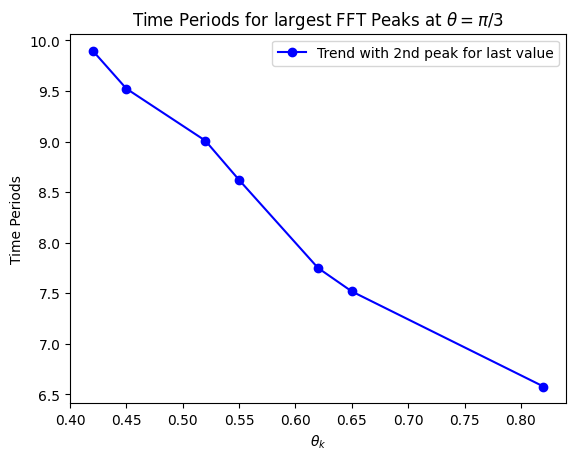

In [3]:
timeperiod_list = [100,83.333,125,62.5,111.11111111,100,111.11111111]
timeperiod_list_2 = [6.578,7.518,7.75,8.62,9.009,9.523,9.90]

#plt.plot(theta_k_list,timeperiod_list,'r',label = "Anomalous with max peaks")
plt.plot(theta_k_list,timeperiod_list_2,'bo-',label = "Trend with 2nd peak for last value")
plt.xlabel(r"$\theta_k$")
plt.ylabel("Time Periods")
plt.legend()
plt.title("Time Periods for largest FFT Peaks at " + r"$\theta = \pi/3$")
plt.show()

Prominent frequencies for theta =  1.07  are  [0.006, 0.009000000000000001, 0.013000000000000001, 0.015, 0.017, 0.021, 0.025, 0.111, 0.114, 0.116]
Time periods for theta =  1.07  are  [166.66666667 111.11111111  76.92307692  66.66666667  58.82352941
  47.61904762  40.           9.00900901   8.77192982   8.62068966]
Prominent Peak values for theta =  1.07  are  [12.538683474288051, 12.265013906823324, 12.346529546843533, 27.012639763958738, 10.541107427479806, 17.135148652844304, 13.01849468253315, 19.747575575261106, 12.583339961824443, 18.013405941184324]


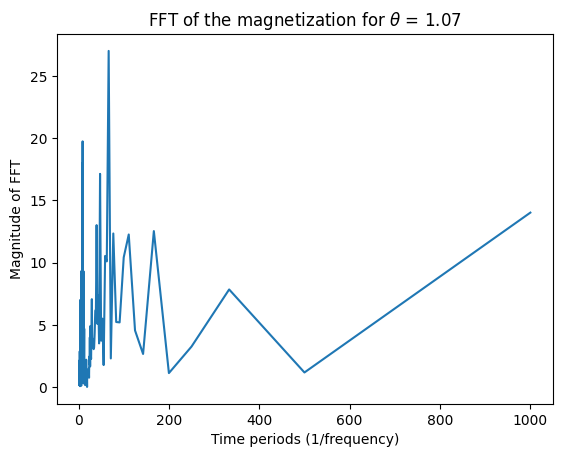

Prominent frequencies for theta =  0.97  are  [0.01, 0.015, 0.024, 0.044, 0.113]
Time periods for theta =  0.97  are  [100.          66.66666667  41.66666667  22.72727273   8.84955752]
Prominent Peak values for theta =  0.97  are  [39.4846907986692, 12.899559099095915, 31.270970135499468, 13.361076600700265, 16.634686075206126]


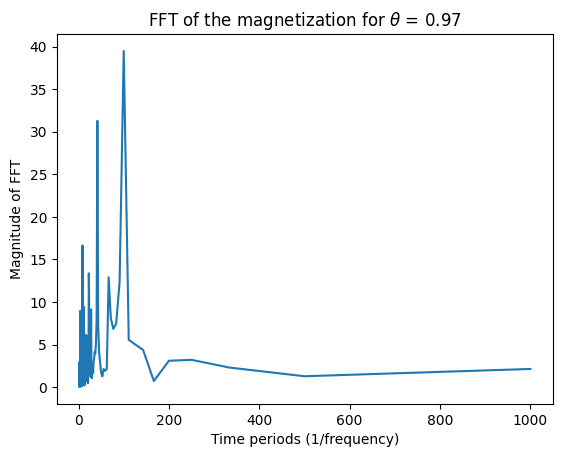

Prominent frequencies for theta =  0.87  are  [0.002, 0.004, 0.007, 0.139]
Time periods for theta =  0.87  are  [500.         250.         142.85714286   7.1942446 ]
Prominent Peak values for theta =  0.87  are  [10.530240595493156, 12.569941725239936, 15.56018576766407, 13.554870733857022]


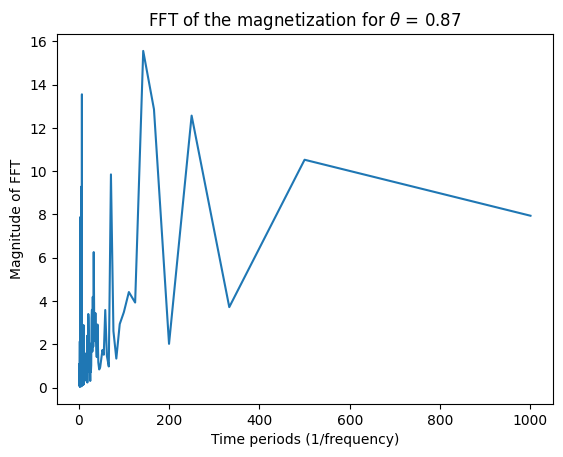

Prominent frequencies for theta =  0.77  are  [0.134]
Time periods for theta =  0.77  are  [7.46268657]
Prominent Peak values for theta =  0.77  are  [11.69466543517021]


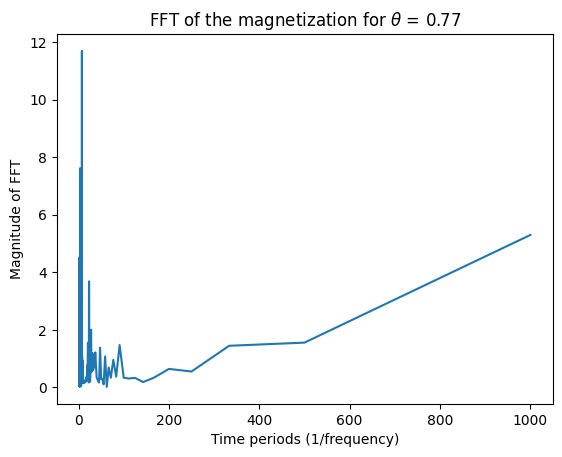

Prominent frequencies for theta =  0.67  are  [0.011, 0.123, 0.276]
Time periods for theta =  0.67  are  [90.90909091  8.1300813   3.62318841]
Prominent Peak values for theta =  0.67  are  [10.862114990386225, 23.68205617691881, 20.749655700193102]


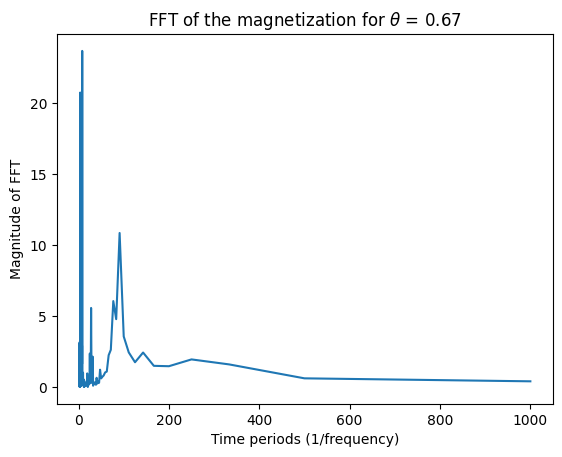

Prominent frequencies for theta =  0.57  are  [0.008, 0.107, 0.243]
Time periods for theta =  0.57  are  [125.           9.34579439   4.11522634]
Prominent Peak values for theta =  0.57  are  [12.603825695157466, 47.52049403461047, 30.524719398410394]


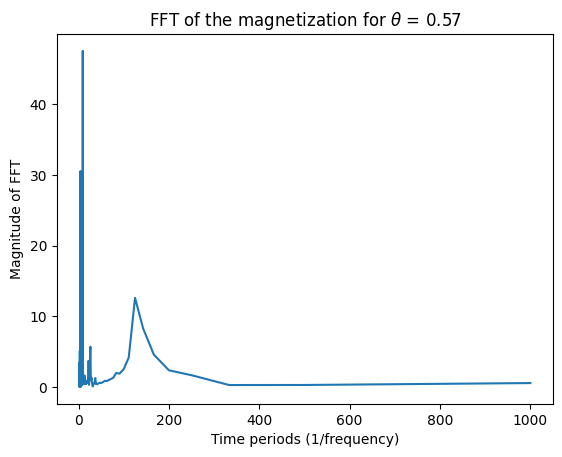

In [4]:
theta_list = [1.07,0.97, 0.87, 0.77, 0.67, 0.57]
theta_k = 0.52
max_trotter_steps = 1000

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""
for theta in theta_list:
    for i in range(max_trotter_steps):
        data2 = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals3[i] = data2[1]  

        #FFT to find out the frequency of the oscillations
    fft2 = fft(sz_vals3)
        #find list of frequencies

    freqs2 = np.fft.fftfreq(len(sz_vals3))
        #find the peaks
    peaks2, _ = find_peaks(np.abs(fft2))
    peaks2 = peaks2[freqs2[peaks2] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs2 = [freqs2[i] for i in peaks2 if np.abs(fft2[i]) > 10]

    time_periods2 = 1/np.abs(prom_freqs2)

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks

    print("Prominent frequencies for theta = ",theta," are ",prom_freqs2) #print the prominent frequencies
    print("Time periods for theta = ",theta," are ",time_periods2) #print the time periods

    peak_vals2 = [np.abs(fft2[i]) for i in peaks2 if np.abs(fft2[i]) > 10] #find the prominent peak values

    print("Prominent Peak values for theta = ",theta," are ",peak_vals2) #print the peak values

    #Plot only the positive frequencies and the magnitudes at those frequencies

    freqs_pos2 = freqs2[freqs2 > 0]
    time_periods_2 = 1/freqs_pos2
    fft2_pos = fft2[freqs2 > 0]


        #plot the magnitudes wrt to the frequencies
    plt.plot(time_periods_2,np.abs(fft2_pos))
    plt.xlabel("Time periods (1/frequency)")
    plt.ylabel("Magnitude of FFT")
    plt.title(r"FFT of the magnetization for $\theta$ = " + str(theta))
    plt.show()

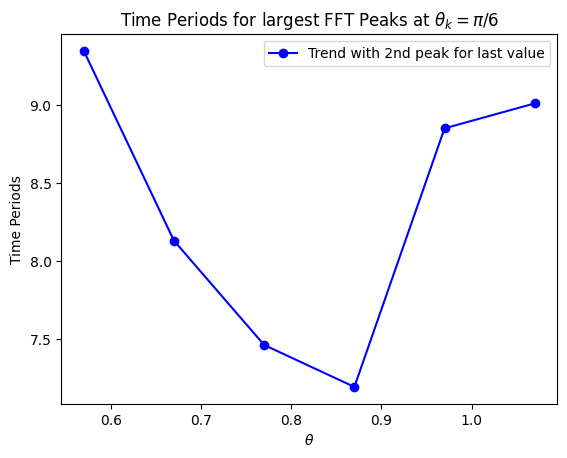

In [5]:
timeperiod_list2 = [9.00900901,8.84955752,7.1942446,7.4626,8.13,9.345]

#plt.plot(theta_k_list,timeperiod_list,'r',label = "Anomalous with max peaks")
plt.plot(theta_list,timeperiod_list2,'bo-',label = "Trend with 2nd peak for last value")
plt.xlabel(r"$\theta$")
plt.ylabel("Time Periods")
plt.legend()
plt.title("Time Periods for largest FFT Peaks at " + r"$\theta_k = \pi/6$")
plt.show()

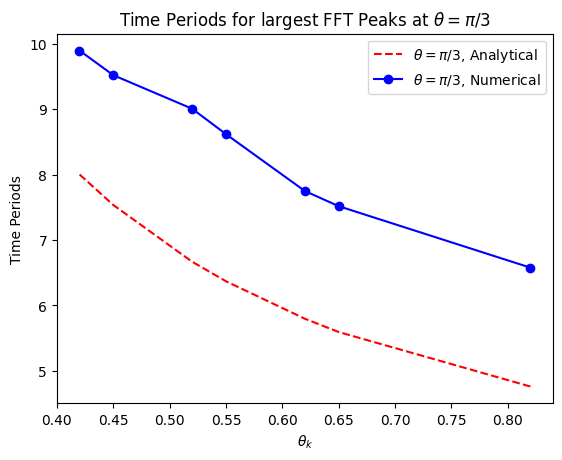

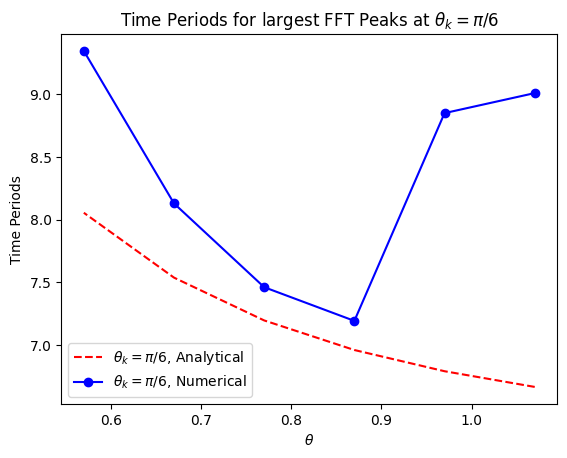

In [6]:
## Now, we see some values from the theoretical graph

timeperiod_list3 = [1/0.210141,1/0.178817,1/0.172541,1/0.157006,1/0.149969,1/0.132684,1/0.124919] #contant values for theta = 1.07
timeperiod_list4 = [1/0.149969,1/0.147208,1/0.143635,1/0.138933,1/0.132647,1/0.124137] #constant values for theta_k = 0.52

plt.plot(theta_k_list,timeperiod_list3,'r--',label = r"$\theta = \pi/3$, Analytical")
plt.plot(theta_k_list,timeperiod_list_2,'bo-',label = r"$\theta = \pi/3$, Numerical")
plt.xlabel(r"$\theta_k$")
plt.ylabel("Time Periods")
plt.legend()
plt.title("Time Periods for largest FFT Peaks at " + r"$\theta = \pi/3$")

plt.show()

plt.plot(theta_list,timeperiod_list4,'r--',label = r"$\theta_k = \pi/6$, Analytical")
plt.plot(theta_list,timeperiod_list2,'bo-',label = r"$\theta_k = \pi/6$, Numerical")
plt.xlabel(r"$\theta$")
plt.ylabel("Time Periods")
plt.legend()
plt.title("Time Periods for largest FFT Peaks at " + r"$\theta_k = \pi/6$")
plt.show()



In [11]:
w = 0.4128
def tk_col(theta,theta_k):
    return 2*theta*np.cos(theta)*np.exp(-np.pi*np.sin(theta)/theta_k)

Average of the magnetization values between for theta = 1.07 and theta_k = 0.52 is  -0.3968939322269988
Numerical tb is 3.2025764663717067
Analytical tb is 252.76762345911536


C:\Users\DELL\AppData\Local\Temp\ipykernel_10500\1155835509.py:33: OptimizeWarning: Covariance of the parameters could not be estimated
  optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)


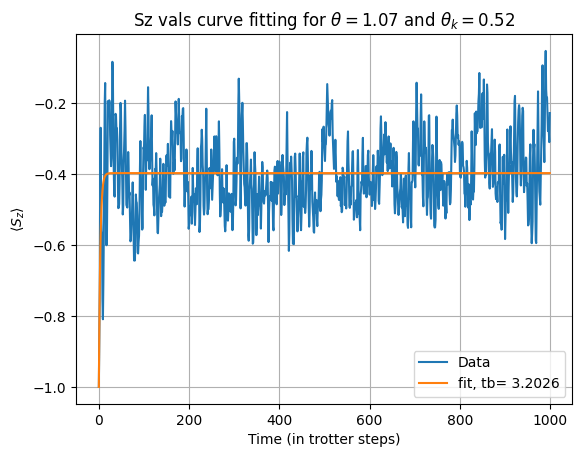

Average of the magnetization values between for theta = 0.97 and theta_k = 0.52 is  -0.46822899275762464
Numerical tb is 4.410290987527689
Analytical tb is 172.64138127662017


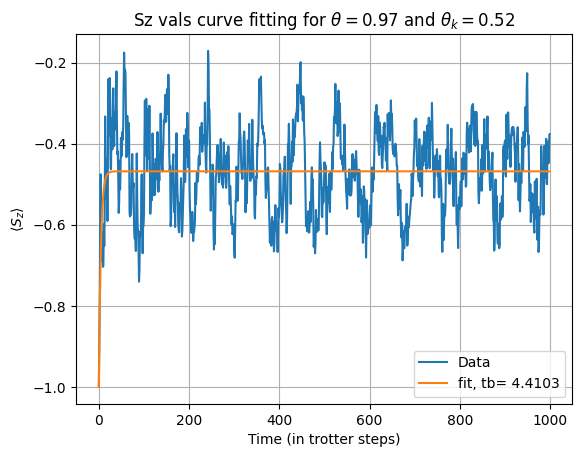

Average of the magnetization values between for theta = 0.87 and theta_k = 0.52 is  -0.577514852851893
Numerical tb is 11.576555270842459
Analytical tb is 117.04266158341261


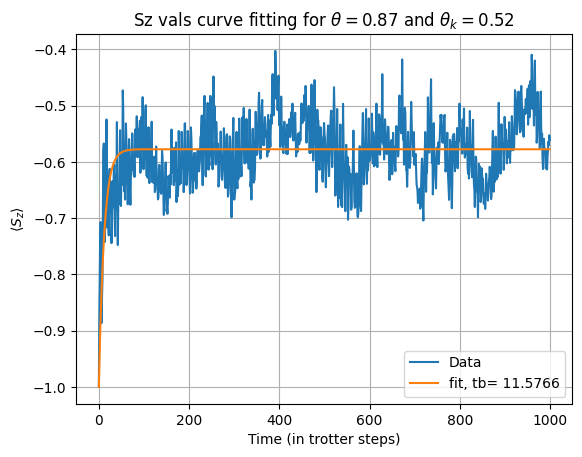

Average of the magnetization values between for theta = 0.77 and theta_k = 0.52 is  -0.8079997195398919
Numerical tb is 0.8228130114652592
Analytical tb is 78.6717019122484


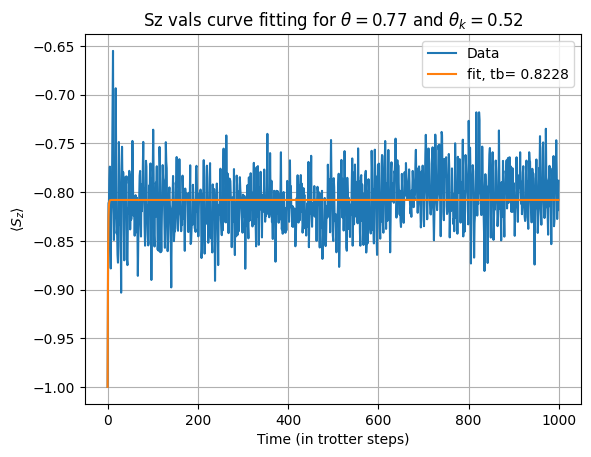

Average of the magnetization values between for theta = 0.67 and theta_k = 0.52 is  -0.7509421031160395
Numerical tb is 1.710600895846669
Analytical tb is 52.59094255862123


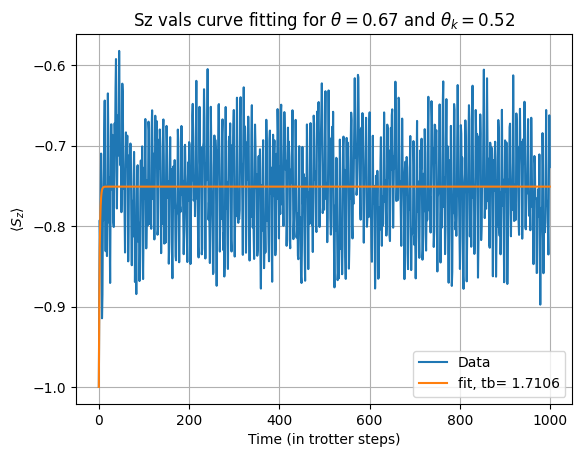

Average of the magnetization values between for theta = 0.57 and theta_k = 0.52 is  -0.7303104778042391
Numerical tb is 1.2171411336064288
Analytical tb is 35.20550951677035


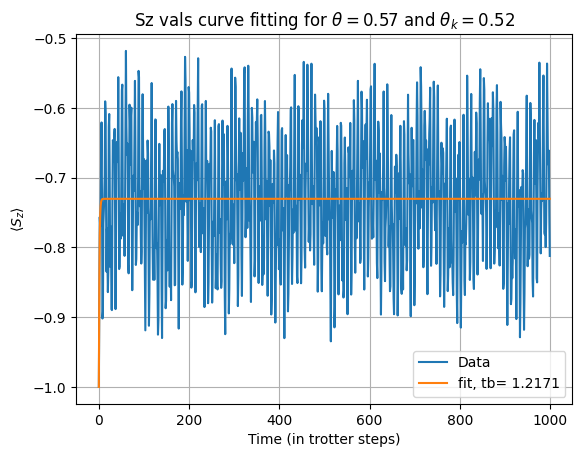

In [12]:
## Let us plot the magnetization for the theta_k = 0.52 case

#Let us find the numerical decay rate of the magnetization

#Fir we have to find the average of the magnetization values from t1 to t2

t1 = 100
t2 = 1000
numerical_tb_list1 = []
analytical_tb_list1 = []


theta_k = 0.52

for theta in theta_list:
    sz_vals = []
    

    for i in range(t2):
        data = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals.append(data[1])

    #Find the average of the magnetization values between t1 and t2

    avg = np.mean(sz_vals[t1:t2])
    print(f"Average of the magnetization values between for theta = {theta} and theta_k = {theta_k} is ",avg)
    xdata = np.array(list(range(t2)))
    ydata = np.array(sz_vals)

    def func(x, b, a , w, phi):
        return (-1-avg)*np.exp(-x/b) + avg #+ (a*np.sin(w*x + phi))

    optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)

    # Use the optimized parameters to plot the best fit
    plt.plot(xdata, ydata, "-", label="Data")
    plt.plot(xdata, func(xdata, *optimizedParameters1), label="fit, tb= {}".format(round(optimizedParameters1[0],4)))

    print("Numerical tb is",optimizedParameters1[0])
    numerical_tb_list1.append(optimizedParameters1[0])
    analytical_tb = w*np.pi/tk_col(theta,theta_k)

    print("Analytical tb is",analytical_tb)
    analytical_tb_list1.append(analytical_tb)

    # Show the graph
    plt.legend()
    plt.title("Sz vals curve fitting for " + r"$\theta = $" + f"{theta}" + " and " + r"$\theta_k = $" +  f"{theta_k}")
    plt.ylabel(r"$\langle S_z \rangle$")
    plt.xlabel(r"Time (in trotter steps)")
    #plt.ticklabel_format(axis='both', style='sci', scilimits=(-4,0))
    plt.grid()
    plt.show()

Average of the magnetization values between for theta = 1.07 and theta_k = 0.82 is  -0.3766113678767438
Numerical tb is 1.2425835013035238
Analytical tb is 36.36410709373461


C:\Users\DELL\AppData\Local\Temp\ipykernel_10500\2621173246.py:21: OptimizeWarning: Covariance of the parameters could not be estimated
  optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)


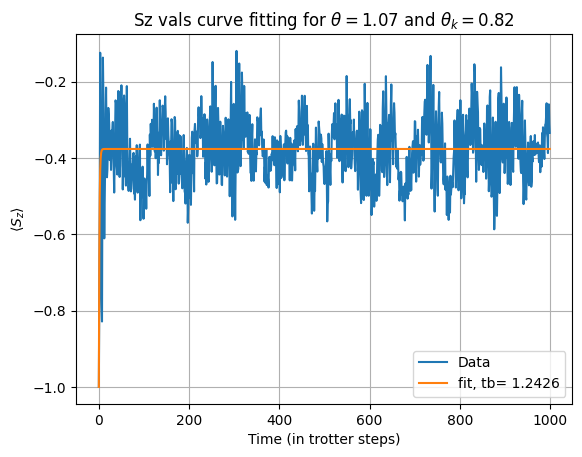

Average of the magnetization values between for theta = 1.07 and theta_k = 0.65 is  -0.3258947512522477
Numerical tb is 3.7918755070623282
Analytical tb is 87.57932410340248


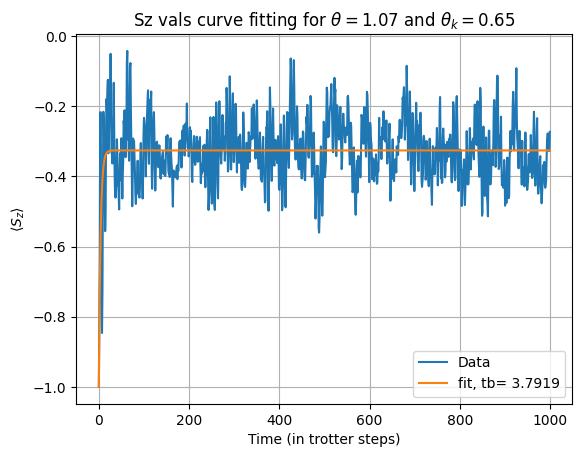

Average of the magnetization values between for theta = 1.07 and theta_k = 0.62 is  -0.3404451526345397
Numerical tb is 3.6511962419116104
Analytical tb is 107.52160903329623


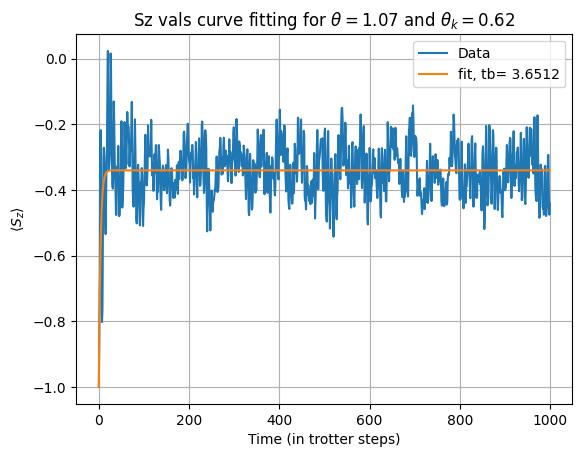

Average of the magnetization values between for theta = 1.07 and theta_k = 0.55 is  -0.3851484827962646
Numerical tb is 3.16043913339822
Analytical tb is 189.31266372830447


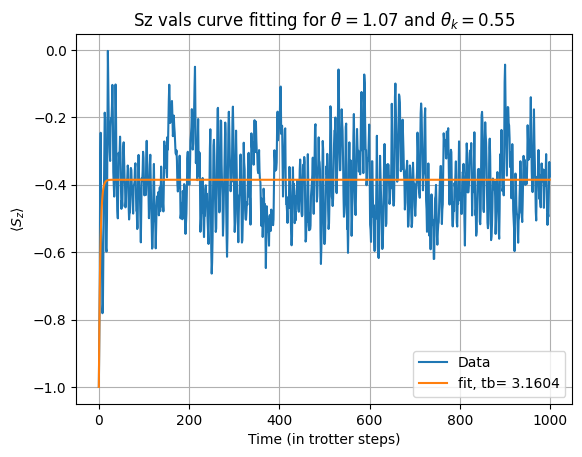

Average of the magnetization values between for theta = 1.07 and theta_k = 0.52 is  -0.3968939322269988
Numerical tb is 3.2025764663717067
Analytical tb is 252.76762345911536


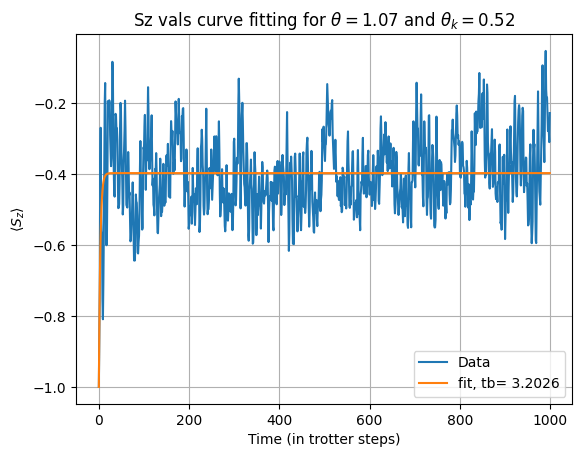

Average of the magnetization values between for theta = 1.07 and theta_k = 0.45 is  -0.44840076450213556
Numerical tb is 2.575938899510046
Analytical tb is 576.431890710391


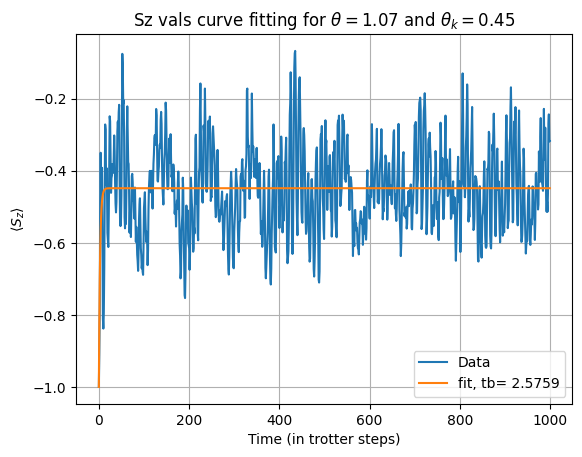

Average of the magnetization values between for theta = 1.07 and theta_k = 0.42 is  -0.47017512063582995
Numerical tb is 2.442114476524852
Analytical tb is 892.7323523632931


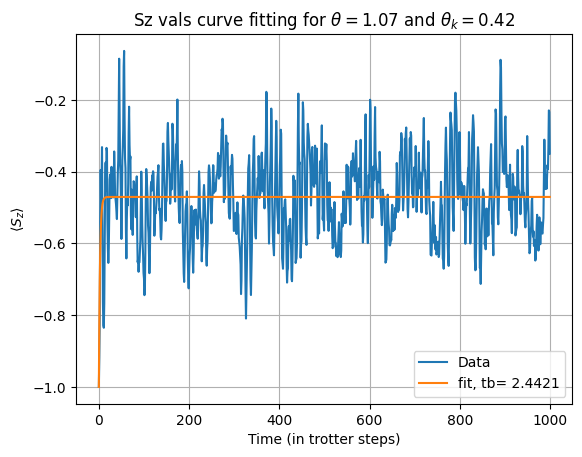

In [13]:
theta = 1.07

for theta_k in theta_k_list:
    sz_vals = []
    

    for i in range(t2):
        data = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals.append(data[1])

    #Find the average of the magnetization values between t1 and t2

    avg = np.mean(sz_vals[t1:t2])
    print(f"Average of the magnetization values between for theta = {theta} and theta_k = {theta_k} is ",avg)
    xdata = np.array(list(range(t2)))
    ydata = np.array(sz_vals)

    def func(x, b, a , w, phi):
        return (-1-avg)*np.exp(-x/b) + avg #+ (a*np.sin(w*x + phi))

    optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)

    # Use the optimized parameters to plot the best fit
    plt.plot(xdata, ydata, "-", label="Data")
    plt.plot(xdata, func(xdata, *optimizedParameters1), label="fit, tb= {}".format(round(optimizedParameters1[0],4)))

    print("Numerical tb is",optimizedParameters1[0])
    numerical_tb_list1.append(optimizedParameters1[0])
    analytical_tb = w*np.pi/tk_col(theta,theta_k)

    print("Analytical tb is",analytical_tb)
    analytical_tb_list1.append(analytical_tb)

    # Show the graph
    plt.legend()
    plt.title("Sz vals curve fitting for " + r"$\theta = $" + f"{theta}" + " and " + r"$\theta_k = $" +  f"{theta_k}")
    plt.ylabel(r"$\langle S_z \rangle$")
    plt.xlabel(r"Time (in trotter steps)")
    #plt.ticklabel_format(axis='both', style='sci', scilimits=(-4,0))
    plt.grid()
    plt.show()